In [1]:
import pandas as pd
import numpy as np


In [2]:
train_df=pd.read_csv("bigmart_train.csv")

In [3]:
train_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train_df.shape

(8523, 12)

In [6]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train_df["Item_Weight"].nunique()

415

In [8]:
# adding an extra column of age of outlet 

train_df["Outlet Age"]=2023-train_df["Outlet_Establishment_Year"]

In [9]:
train_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


In [10]:
# Missing Value Treatment

In [11]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet Age                      0
dtype: int64

In [12]:
train_df["Item_Weight"]=train_df["Item_Weight"].fillna(train_df["Item_Weight"].mean())

In [13]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet Age                      0
dtype: int64

In [14]:
train_df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
train_df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
train_df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [17]:
train_df["Outlet_Size"]=train_df["Outlet_Size"].fillna(train_df["Outlet_Size"].mode()[0])

In [18]:
train_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet Age
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000,0.049135
Outlet Age,0.008301,0.074834,-0.005020,-1.000000,0.049135,1.000000


In [19]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet Age                     int64
dtype: object

<AxesSubplot:>

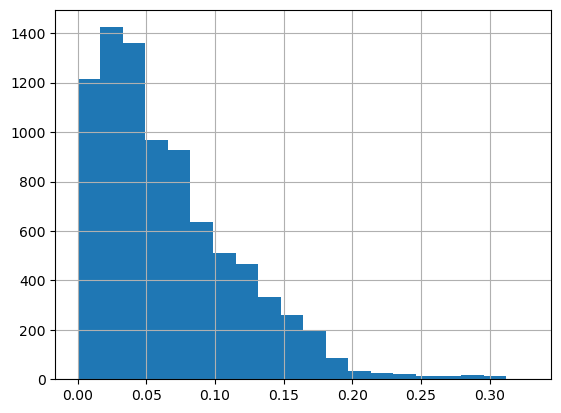

In [20]:
train_df["Item_Visibility"].hist(bins=20)

In [21]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x16290a45790>,
 'caps': [<matplotlib.lines.Line2D at 0x16290a45d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x16290a454c0>],
 'medians': [<matplotlib.lines.Line2D at 0x16290a56310>],
 'fliers': [<matplotlib.lines.Line2D at 0x16290a565e0>],
 'means': []}

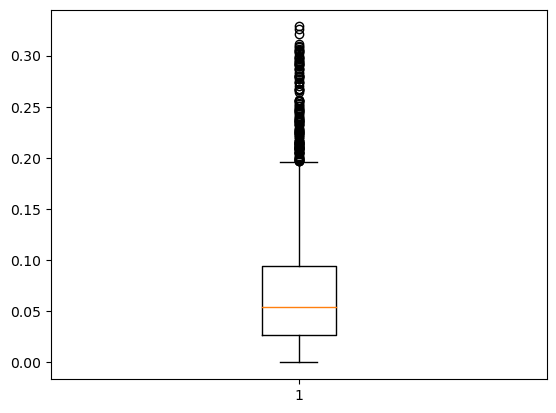

In [22]:
plt.boxplot(train_df["Item_Visibility"])

In [23]:
# There are outliers in the data. The outliers should be removed

In [24]:
Q1=train_df["Item_Visibility"].quantile(0.25)
Q3=train_df["Item_Visibility"].quantile(0.75)
IQR=Q3-Q1


In [25]:
filt_df=train_df.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [26]:
filt_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


{'whiskers': [<matplotlib.lines.Line2D at 0x16290ae3580>,
 'caps': [<matplotlib.lines.Line2D at 0x16290ae3b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x16290ae32b0>],
 'medians': [<matplotlib.lines.Line2D at 0x16290af0100>],
 'fliers': [<matplotlib.lines.Line2D at 0x16290af03d0>],
 'means': []}

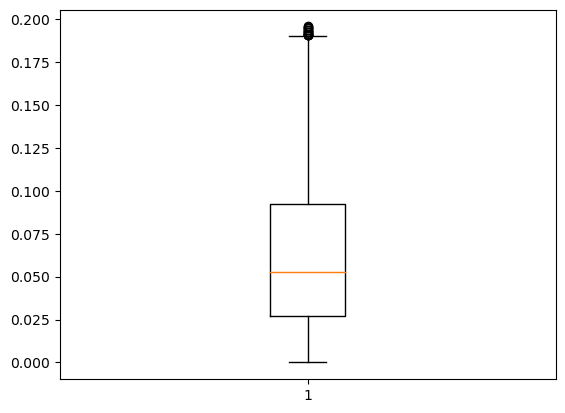

In [27]:
plt.boxplot(filt_df["Item_Visibility"])

In [28]:
train_df=filt_df

In [29]:
train_df.shape

(8379, 13)

In [30]:
train_df["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.093914      2
0.086765      2
0.046825      2
           ... 
0.124646      1
0.054142      1
0.018920      1
0.044974      1
0.044878      1
Name: Item_Visibility, Length: 7736, dtype: int64

In [31]:
# Creating a category
train_df["Item_Visibility_bins"] = pd.cut(train_df["Item_Visibility"],[0.00,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])

In [32]:
train_df["Item_Visibility_bins"].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [33]:
train_df["Item_Visibility_bins"]=train_df["Item_Visibility_bins"].replace(np.nan,'Low Viz',regex=True)

In [34]:
train_df["Item_Visibility_bins"].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [35]:
train_df["Item_Visibility_bins"].isnull().sum()

526

In [36]:
train_df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet Age',
       'Item_Visibility_bins'],
      dtype='object')

In [37]:
train_df["Item_Fat_Content"].value_counts()

Low Fat    5016
Regular    2831
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

In [38]:
# Replacing the values of the LF , low fat, with Low Fat and reg with Regular

In [39]:
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace(['LF','low fat'],'Low Fat')

In [40]:
train_df["Item_Fat_Content"]=train_df["Item_Fat_Content"].replace('reg','Regular')

In [41]:
train_df["Item_Fat_Content"].value_counts()

Low Fat    5432
Regular    2947
Name: Item_Fat_Content, dtype: int64

In [42]:
train_df.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
Outlet Age                      int64
Item_Visibility_bins         category
dtype: object

In [43]:
train_df=train_df.drop(["Item_Identifier",'Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [44]:
train_df.dtypes

Item_Weight              float64
Item_Fat_Content          object
Item_Visibility          float64
Item_MRP                 float64
Outlet_Size               object
Outlet_Location_Type      object
Item_Outlet_Sales        float64
Outlet Age                 int64
Item_Visibility_bins    category
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
train_df["Item_Fat_Content"]=le.fit_transform(train_df["Item_Fat_Content"])

In [47]:
train_df["Item_Fat_Content"].value_counts()

0    5432
1    2947
Name: Item_Fat_Content, dtype: int64

In [48]:
train_df["Outlet_Size"].value_counts()

Medium    5136
Small     2311
High       932
Name: Outlet_Size, dtype: int64

In [49]:
train_df["Outlet_Size"]=le.fit_transform(train_df["Outlet_Size"])

In [50]:
train_df["Outlet_Location_Type"].value_counts()

Tier 3    3283
Tier 2    2785
Tier 1    2311
Name: Outlet_Location_Type, dtype: int64

In [51]:
train_df["Outlet_Location_Type"]=le.fit_transform(train_df["Outlet_Location_Type"])

In [52]:
train_df["Item_Visibility_bins"].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [53]:
train_df["Item_Visibility_bins"]=le.fit_transform(train_df["Item_Visibility_bins"])

In [54]:
train_dff=pd.read_csv("bigmart_train.csv")

In [55]:
train_dff=train_dff.drop(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales'],axis=1)

In [56]:
train_dff.head(5)

,Outlet_Type
0,Supermarket Type1
1,Supermarket Type2
2,Supermarket Type1
3,Grocery Store
4,Supermarket Type1


In [57]:
train_df=pd.concat([train_df,train_dff],axis=1)

In [58]:
train_df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet Age,Item_Visibility_bins,Outlet_Type
0,9.30,0.0,0.016047,249.8092,1.0,0.0,3735.1380,24.0,1.0,Supermarket Type1
1,5.92,1.0,0.019278,48.2692,1.0,2.0,443.4228,14.0,1.0,Supermarket Type2
2,17.50,0.0,0.016760,141.6180,1.0,0.0,2097.2700,24.0,1.0,Supermarket Type1
3,19.20,1.0,0.000000,182.0950,1.0,2.0,732.3800,25.0,3.0,Grocery Store
4,8.93,0.0,0.000000,53.8614,0.0,2.0,994.7052,36.0,3.0,Supermarket Type1


In [59]:
train_df.dtypes

Item_Weight             float64
Item_Fat_Content        float64
Item_Visibility         float64
Item_MRP                float64
Outlet_Size             float64
Outlet_Location_Type    float64
Item_Outlet_Sales       float64
Outlet Age              float64
Item_Visibility_bins    float64
Outlet_Type              object
dtype: object

In [60]:
dummy=pd.get_dummies(train_df["Outlet_Type"])

In [61]:
dummy.head(2)

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0


In [62]:
train_df=pd.concat([train_df,dummy],axis=1)

In [63]:
train_df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet Age,Item_Visibility_bins,Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.0,0.016047,249.8092,1.0,0.0,3735.1380,24.0,1.0,Supermarket Type1,0,1,0,0
1,5.92,1.0,0.019278,48.2692,1.0,2.0,443.4228,14.0,1.0,Supermarket Type2,0,0,1,0
2,17.50,0.0,0.016760,141.6180,1.0,0.0,2097.2700,24.0,1.0,Supermarket Type1,0,1,0,0
3,19.20,1.0,0.000000,182.0950,1.0,2.0,732.3800,25.0,3.0,Grocery Store,1,0,0,0
4,8.93,0.0,0.000000,53.8614,0.0,2.0,994.7052,36.0,3.0,Supermarket Type1,0,1,0,0


In [64]:
train_df=train_df.drop(["Outlet_Type"],axis=1)

In [65]:
# Building the logistic regression model

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
test_df=pd.read_csv("bigmart_test.csv")

In [69]:
test_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [70]:
test_df.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [71]:
test_df["Item_Weight"].nunique()

410

In [72]:
test_df["Item_Weight"]= test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean())

In [73]:
test_df["Outlet_Size"]= test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0])

In [74]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [75]:
test_df["Item_Visibility_bins"]=pd.cut(test_df["Item_Visibility"],[0.00,0.065,0.13,0.2],labels=['Low Viz', 'Viz', 'High Viz'])

In [76]:
test_df.drop(["Item_Visibility"],axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_bins
0,FDW58,20.750000,Low Fat,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Low Viz
1,FDW14,8.300000,reg,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low Viz
2,NCN55,14.600000,Low Fat,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Viz
3,FDQ58,7.315000,Low Fat,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low Viz
4,FDY38,12.695633,Regular,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Viz
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,Low Viz
5677,FDD47,7.600000,Regular,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,High Viz
5678,NCO17,10.000000,Low Fat,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,Viz
5679,FDJ26,15.300000,Regular,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [77]:
test_df.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Visibility_bins         category
dtype: object

In [78]:
test_df["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [79]:
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace(['LF','low fat'],'Low Fat')

In [80]:
test_df["Item_Fat_Content"]=test_df["Item_Fat_Content"].replace('reg','Regular')

In [81]:
test_df["Item_Visibility_bins"].value_counts()

Low Viz     2960
Viz         1726
High Viz     536
Name: Item_Visibility_bins, dtype: int64

In [82]:
test_df["Item_Visibility_bins"].isnull().sum()

459

In [83]:
test_df["Item_Visibility_bins"]=test_df["Item_Visibility_bins"].fillna('Low Viz')

In [84]:
test_df["Item_Fat_Content"]=le.fit_transform(test_df["Item_Fat_Content"])

In [85]:
test_df["Item_Visibility_bins"]=le.fit_transform(test_df["Item_Visibility_bins"])

In [86]:
test_df["Outlet_Size"].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [87]:
test_df["Outlet_Size"]=le.fit_transform(test_df["Outlet_Size"])

In [88]:
test_df["Outlet_Location_Type"]=le.fit_transform(test_df["Outlet_Location_Type"])

In [89]:
test_df["Outlet_Type"].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [90]:
dummies2=pd.get_dummies(test_df["Outlet_Type"])   

In [91]:
test_df=pd.concat([test_df,dummies2],axis=1)

In [92]:
test_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [93]:
test_df.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Type"],axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750000,0,0.007565,107.8622,1,0,1,0,1,0,0
1,8.300000,1,0.038428,87.3198,1,1,1,0,1,0,0
2,14.600000,0,0.099575,241.7538,1,2,2,1,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,1,0,1,0,0
4,12.695633,1,0.118599,234.2300,1,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,2,0,1,0,1,0,0
5677,7.600000,1,0.142991,169.1448,1,2,0,0,0,1,0
5678,10.000000,0,0.073529,118.7440,1,1,2,0,1,0,0
5679,15.300000,1,0.000000,214.6218,1,1,1,0,1,0,0


In [94]:
train_df.dtypes

Item_Weight             float64
Item_Fat_Content        float64
Item_Visibility         float64
Item_MRP                float64
Outlet_Size             float64
Outlet_Location_Type    float64
Item_Outlet_Sales       float64
Outlet Age              float64
Item_Visibility_bins    float64
Grocery Store             uint8
Supermarket Type1         uint8
Supermarket Type2         uint8
Supermarket Type3         uint8
dtype: object

In [95]:
train_df.isnull().sum()

Item_Weight             144
Item_Fat_Content        144
Item_Visibility         144
Item_MRP                144
Outlet_Size             144
Outlet_Location_Type    144
Item_Outlet_Sales       144
Outlet Age              144
Item_Visibility_bins    144
Grocery Store             0
Supermarket Type1         0
Supermarket Type2         0
Supermarket Type3         0
dtype: int64

In [96]:
train_df["Item_Weight"].fillna(test_df["Item_Weight"].mean(),inplace=True)

In [102]:
train_df.isnull().sum()

Item_Weight               0
Item_Fat_Content        144
Item_Visibility         144
Item_MRP                144
Outlet_Size             144
Outlet_Location_Type    144
Item_Outlet_Sales       144
Outlet Age              144
Item_Visibility_bins    144
Grocery Store             0
Supermarket Type1         0
Supermarket Type2         0
Supermarket Type3         0
dtype: int64

In [106]:

train_df["Item_Fat_Content"].fillna(test_df["Item_Fat_Content"].mean(),inplace=True)

In [108]:
train_df["Item_Visibility"].fillna(test_df["Item_Visibility"].mean(),inplace=True)

In [109]:
train_df["Item_MRP"].fillna(test_df["Item_MRP"].mean(),inplace=True)

In [ ]:
train_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mean(),inplace=True)

In [ ]:
train_df["Outlet_Location_Type"].fillna(test_df["Outlet_Location_Type"].mean(),inplace=True)

In [115]:
train_df["Outlet Age"].mean()

25.0515574650913

In [116]:
train_df["Outlet Age"].fillna(25.0515574650913,inplace=True)

In [117]:
train_df["Item_Visibility_bins"].fillna(test_df["Item_Visibility_bins"].mean(),inplace=True)

In [118]:
train_df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.0,0.016047,249.8092,1.0,0.0,3735.1380,24.0,1.0,0,1,0,0
1,5.92,1.0,0.019278,48.2692,1.0,2.0,443.4228,14.0,1.0,0,0,1,0
2,17.50,0.0,0.016760,141.6180,1.0,0.0,2097.2700,24.0,1.0,0,1,0,0
3,19.20,1.0,0.000000,182.0950,1.0,2.0,732.3800,25.0,3.0,1,0,0,0
4,8.93,0.0,0.000000,53.8614,0.0,2.0,994.7052,36.0,3.0,0,1,0,0


In [119]:
train_df.isnull().sum()

Item_Weight               0
Item_Fat_Content          0
Item_Visibility           0
Item_MRP                  0
Outlet_Size               0
Outlet_Location_Type      0
Item_Outlet_Sales       144
Outlet Age                0
Item_Visibility_bins      0
Grocery Store             0
Supermarket Type1         0
Supermarket Type2         0
Supermarket Type3         0
dtype: int64

In [122]:
train_df["Item_Outlet_Sales"].mean()

2212.89170442774

In [124]:
train_df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Item_Outlet_Sales       0
Outlet Age              0
Item_Visibility_bins    0
Grocery Store           0
Supermarket Type1       0
Supermarket Type2       0
Supermarket Type3       0
dtype: int64

In [123]:
train_df["Item_Outlet_Sales"].fillna(2212.89170442774,inplace=True)

In [130]:
X=train_df.drop(["Item_Outlet_Sales"],axis=1)
y=train_df["Item_Outlet_Sales"]

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lr_train=LinearRegression()

In [134]:
lr_train.fit(X_train,y_train)

LinearRegression()

In [135]:
print("The coeffient of the model is :")
print(lr_train.coef_)

The intercept of the model is :
[ 1.20667999e+00  3.38862764e+01 -6.33514268e+02  1.58074673e+01
 -6.04380893e+01 -3.05537524e+01 -1.00893494e+01  9.24637213e-01
 -1.51654453e+03  9.37195137e+01 -2.71227996e+02  1.69405302e+03]


In [136]:
print("The intercept of the model is :")
print(lr_train.intercept_)

The intercept of the model is :
320.31699920955816


In [138]:
y_pred_train=lr_train.predict(X_train)

In [139]:
y_pred_test=lr_train.predict(X_test)

In [140]:
comp_value_diff = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_test})
comp_value_diff.head(10)

,Actual,Predicted
606,2865.603200,2918.425855
3645,852.889800,197.333860
2595,503.344800,-383.988620
2048,849.560800,692.422756
1437,6018.166200,4095.298473
6884,5816.428800,3640.597994
1620,1537.998000,636.654223
7283,3848.324000,3556.530635
7072,2212.891704,662.303387
3064,1608.572800,1613.673803


In [143]:
from sklearn.metrics import mean_squared_error

In [144]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("The RMSE score is " , RMSE)

The RMSE score is  1102.1481969375134


In [150]:
print("The R2 score of the model is")
print(lr_train.score(X_test,y_test))

The R2 score of the model is
0.5458687544623027


In [153]:
# Checking with the LASSO, RIDGE and ELASTIC NET

In [154]:
from sklearn.linear_model import Ridge

In [155]:
Rigde_train= Ridge(alpha=0.05)

In [156]:
Rigde_train.fit(X_train,y_train)

Ridge(alpha=0.05)

In [157]:
print("The coeffient of the model is :")
print(Rigde_train.coef_)

The coeffient of the model is :
[ 1.20677287e+00  3.38780314e+01 -6.31228155e+02  1.58074496e+01
 -6.04065200e+01 -3.05127104e+01 -1.00847172e+01  9.62325956e-01
 -1.51649921e+03  9.37692877e+01 -2.71158241e+02  1.69388816e+03]


In [159]:
print("The intercept of Rigde model is")
print(Rigde_train.intercept_)

The intercept of Rigde model is
319.90076789231534


In [160]:
y_pred_test2=Rigde_train.predict(X_test)

In [163]:
y_pred_train2=Rigde_train.predict(X_train)

In [165]:
RMSE2=np.sqrt(y_test,y_pred_test2)

In [166]:
print("The RMSE of the Ridge model is ", RMSE2)

The RMSE of the Ridge model is  606     53.531329
3645    29.204277
2595    22.435347
2048    29.147226
1437    77.576841
          ...    
7080    54.186511
5938    39.361359
4138    19.583176
2126    54.143489
7328    20.577872
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [170]:
print("The R2 score of the Ridge model is ")
print(Rigde_train.score(X_test,y_test))

The R2 score of the Ridge model is 
0.5458722730740119


In [171]:
from sklearn.linear_model import Lasso

In [193]:
LM=Lasso(alpha=0.5)

In [194]:
LM.fit(X_train,y_train)

Lasso(alpha=0.5)

In [195]:
print("The coeffient of the model is :")
print(LM.coef_)

The coeffient of the model is :
[ 1.18767567e+00  3.08003681e+01 -3.82187628e+02  1.58057127e+01
 -5.50117816e+01 -2.64994996e+01 -9.63923625e+00  3.96928897e+00
 -1.61598276e+03  0.00000000e+00 -3.59304405e+02  1.58689410e+03]


In [196]:
print("The intercept of Rigde model is")
print(LM.intercept_)

The intercept of Rigde model is
375.2021269925426


In [197]:
y_pred_test3=LM.predict(X_test)

In [198]:
y_pred_train3=LM.predict(X_train)

In [199]:
RMSE3=np.sqrt(y_test,y_pred_test2)

In [200]:
print(RMSE3)

606     53.531329
3645    29.204277
2595    22.435347
2048    29.147226
1437    77.576841
          ...    
7080    54.186511
5938    39.361359
4138    19.583176
2126    54.143489
7328    20.577872
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [201]:
print("The R2 score of the Lasso model is ")
print(LM.score(X_test,y_test))

The R2 score of the Lasso model is 
0.5460105157328612


In [202]:
from sklearn.linear_model import ElasticNet

In [221]:
ENM=ElasticNet(alpha=0.09,l1_ratio=0.2)

In [222]:
ENM.fit(X_train,y_train)

ElasticNet(alpha=0.09, l1_ratio=0.2)

In [223]:
y_pred_test4=ENM.predict(X_test)




In [224]:
y_pred_train4=ENM.predict(X_train)

In [225]:
RMSE4=np.sqrt(y_test,y_pred_test4)

In [226]:
print(RMSE4)

606     53.531329
3645    29.204277
2595    22.435347
2048    29.147226
1437    77.576841
          ...    
7080    54.186511
5938    39.361359
4138    19.583176
2126    54.143489
7328    20.577872
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [227]:
print("The R2 score of the Elastic Net model is ")
print(ENM.score(X_test,y_test))

The R2 score of the Elastic Net model is 
0.5225503871925831


In [228]:
RMSE4=np.sqrt(mean_squared_error(y_test,y_pred_test2))

In [229]:
print(RMSE4)

2695.174138087785


In [230]:
from sklearn.ensemble import GradientBoostingClassifier

In [234]:
XGB=GradientBoostingClassifier(n_estimators=3)

In [236]:
XGB.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'